<div style='background-image: url("main.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 200px ; width: 100%'>
    <div style="float: right ; margin: 20px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.9) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , .8) ; line-height: 100%">Diffusion de particules
            </div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Approche microscopique de la diffusion | Marche au hasard
             </div>
        </div>
    </div>
</div>

# Mise en œuvre du problème physique
##  Équation de diffusion et marche au hasard
La diffusion de particule et la loi de Fick qui la modélise peut-être approchée par une approche stochastique de marche au hasard.</br>

Dans son approche la plus simple, une particule initialement placée au centre d'un repére peut se déplacer dans deux directions de l'espace $Ox$ et $Oy$, d'une même distance $a$, tous les intervalles de temps $\Delta t$. Les vecteurs déplacement élémentaire sont alors : 
$$\vec{d}=\left(a,0\right)\text{ ou }\left(-a,0\right)\text{ ou }\left(0,a\right)\text{ ou }\left(0,-a\right)$$

&nbsp;
Ainsi, les quatre directions de l'espace étant équiprobables, la probabilité qu'à une particule de se trouver en $x,y)$ à l'instant $t+\Delta t$ est donc : 
$$p(x,y,t+\Delta t)=\dfrac{1}{4}\left[p(x+a,y)+p(x-a,y)+p(x,y+a)+p(x,y-a)\right]$$

&nbsp;
Dans l'hypothèse d'un milieu continu où $a$ est très petit devant l'échelle d'observation macroscopique et $\Delta t$ est également petit devant la durée globale du phénomène, on peut écrire : 
$$p(x,y,t+\Delta t)\simeq p(x,y,t)+\dfrac{\partial p}{\partial t}\Delta t\qquad\text{ainsi que}\qquad p(x+a,y)\simeq p(x,y,t)+\dfrac{\partial p}{\partial x}a + \dfrac{\partial^2 p}{\partial x^2}\dfrac{a^2}{2}$$

&nbsp;
La réunion de ces équations donne alors une équation de diffusion : 
$$\dfrac{\partial p}{\partial t}\simeq \dfrac{a^2}{4\Delta t}\Delta p$$
où $\Delta$ est l'opérateur laplacien et $D=\frac{a^2}{4\Delta t}$ est le coefficient de diffusion observé à l'échelle macroscopique.</br>

C'est ce que nous allons essayer de vérifier en mettant en œuvre une marche au hasard numérique.

In [1]:
# commande permettant d'insérer les figures matplotlib dans les notebooks
%matplotlib widget

# import des librairies 
import numpy as np
from scipy.integrate import odeint
from scipy import fft
import matplotlib.pyplot as plt

In [2]:
#Variables d'une trajectoire
a = 1 # distance parcourue à chaque saut
nd = 1001 # nb de sauts et durée d'un saut
Tmax = 1 # durée totale de la marche au hasard

t=np.linspace(0.0, Tmax, nd) # instants de mesure

Delta_t = Tmax/(nd-1) # pas de temps numérique

D_th=a**2/(4*Delta_t) # Diffusion théorique attendue

## Implémentation numérique
Pour y parvenir on va commencer par créer et visualiser une première trajectoire utilisant la fonction `random.choice()` (doc.) qui permet de tirer au hasard, avec une distribution uniforme, une valeur comprise entre 4 choix possible (vers le haut, vers le bas, à droite ou à gauche.)</br>

Les coordonnées $(x,y)$ de chaque étape seront stockés dans un `np.array` et la trajectoire visualisée grâce à `matplotlib`.

Pour que la modélisation est un sens il faut multiplier les particules suivies et en tirer des valeurs statistiques moyennes. On crée donc un tableau `position` identique à `pos_1` mais contenant `Num` particules au lieu d'une seule.

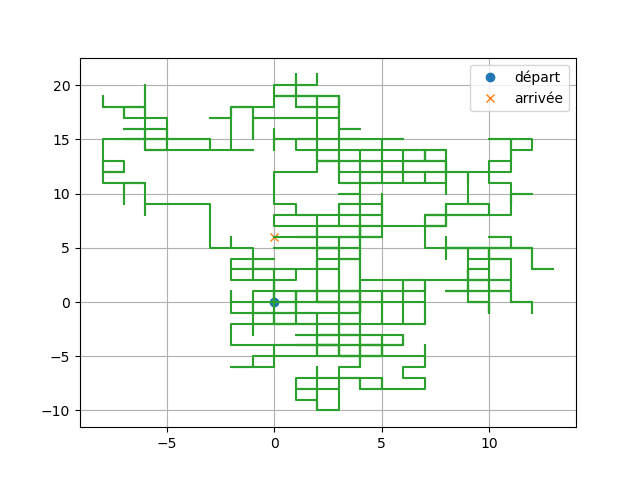

In [3]:
pos_1=np.zeros((nd,2)) # tableau contenant nd couples de deux valeurs (x,y)
for i in range(1,nd):
    step=[[a,0],[-a,0],[0,a],[0,-a]]
    choix=np.array([0,1,2,3])
    ind = np.random.choice(choix,1)[0]#Un pas en avant ou un pas en arrière?
    pos_1[i,:]=pos_1[i-1,:] + step[ind]
    
plt.figure()
plt.plot(0,0,'o', label='départ')
plt.plot(pos_1[nd-1,0],pos_1[nd-1,1],'x', label='arrivée')
plt.legend()
plt.plot(pos_1[:,0],pos_1[:,1])
plt.grid(True)
plt.show()

In [4]:
#Nombre de trajectoires
Num = 1000 #Nb de trajectoires calculées
position = np.zeros((Num,nd,2)) #Tableau contenant toutes les positions 2D au cours du temps

In [5]:
# Simulation des trajectoires
for j in range(Num):
    for i in range(1,nd) :
        step=[[a,0],[-a,0],[0,a],[0,-a]]
        choix=np.array([0,1,2,3])
        ind = np.random.choice(choix,1)[0]#Un pas en avant ou un pas en arrière?
        position[j,i,:] = position[j,i-1,:] + step[ind]

On trace les trajectoires individuelles, en veillant à conserver le rapport d'aspect des deux axes du graphique grâce à la commande `plt.axis('equal')`.</br>

*Attention le tracé peut-être long si `Num` est élevé.*

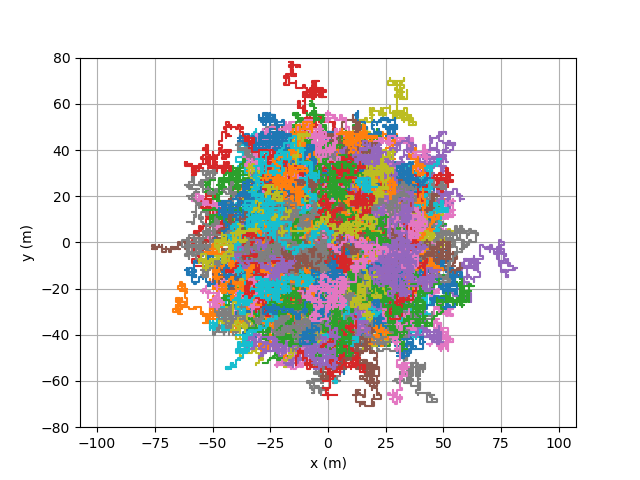

In [6]:
# Tracé de la trajectoire de chaque particule suivie
plt.figure('Evolution spatiale individuelle')
plt.axis('equal')
plt.grid(True)
j = 0
for j in range(Num):
    x=position[j,:,0]
    y=position[j,:,1]
    plt.plot(y,x)
plt.xlim(-80,80)
plt.ylim(-80,80)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

### Animation
On peut visualiser une animation retraçant la position de `Num=1000` particules au cours du temps et constater que les particules occupent tout l'espace autour du point d'émission, avec un rayon d'occupation qui évolue rapidement au départ, puis de plus en plus lentement.

In [7]:
from IPython.display import Video

Video("marche_hasard.mp4", width=640)

## Analyse des résultats obtenus
Si la valeur `Num` est suffisamment élevée, les quatre directions de l'espace sont équitablement visitées et la "surface" occupée par les particules s'approche d'un disque.

&nbsp;
On peut chercher à relier le rayon moyen de ce disque à l'instant $t$ auquel s'arrête la simulation. Si on note $\vec{d}_i=M_iM_{i+1}$ le déplacement réalisé àl'étape $i$, on peut exprimer le rayon atteint par le point $M_k$ à l'étape $k$ par le calcul de $R_k^2=\overrightarrow{OM_k}^2=\left(\sum_{i=0}^{k-1}\vec{d}_i\right)^2$. On en déduit :
$$R_k^2=\sum_{i=0}^{k-1} d_k^2 + \sum_{i\neq j}\vec{d_i}\cdot\vec{d_j}$$

&nbsp;
Le rayon moyen devient alors :
$$\left<R_k^2\right>=Na^2 + 0$$

&nbsp;
En remarquant que $N=\frac{T_\text{max}}{\Delta t}$, il vient : 
$$\left<R_k^2\right>=\dfrac{a^2}{\Delta t}t=4Dt$$

&nbsp;
C'est ce rayon moyen que l'on va calculer en mesurant, à chaque instant, la moyenne des distances $\ell^2=x^2+y^2$ parcourue par les diverses trajectoires. Cette moyenne sera stockée à chaque instant dans la liste `xyquad`, puis tracée dans le graphe ci-dessous.

&nbsp;
On pourra alors comparer cette moyenne à la droite $y=4Dt$ prédite par l'approche statistique développée ci-dessus.

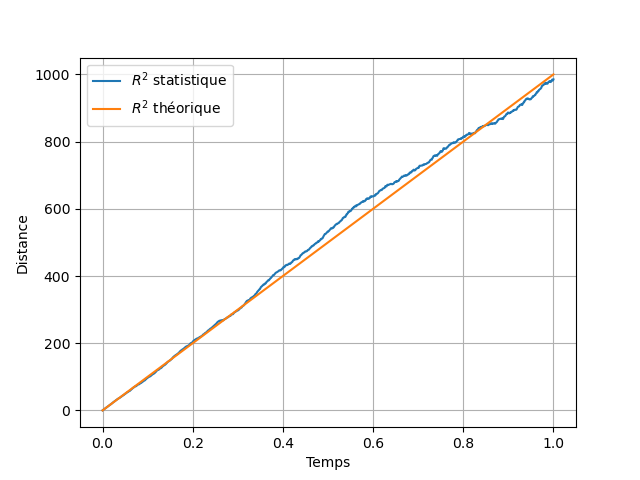

In [8]:
# Tracé de l'évolution temporelle de la moyenne instantannée et quadratique
xyquad=np.zeros(nd)

for i in range(nd): 
    xyquad[i]=np.mean(position[:,i,0]**2+position[:,i,1]**2)

plt.figure('Evolution temporelle')
plt.plot(t,xyquad, label=r"$R^2$ statistique")
plt.plot(t,4*D_th*t, label=r"$R^2$ théorique")
plt.legend()

plt.xlabel('Temps')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

On peut alors faire une évaluation statistique du coefficient de diffusion pour en donner une valeur expérimentale, accompagnée de son incertitude-type.

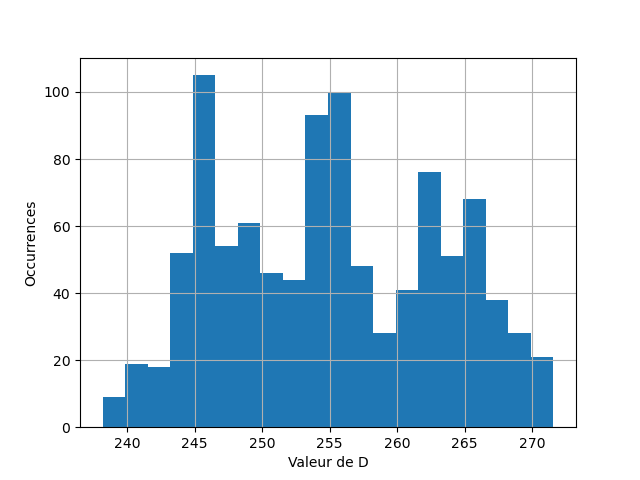

La valeur moyenne mesurée du coefficient de diffusion est  255.133 +/- 8.128 m^2/s
La valeur théorique du coefficient de diffusion est  250.000 m^2/s


In [9]:
Diff=xyquad[1:]/t[1:]

D_mean = np.mean(Diff/4)
D_u = np.std(Diff/4, ddof=1)

plt.figure()
plt.hist(Diff/4,bins='rice')
plt.grid(True)
plt.xlabel('Valeur de D')
plt.ylabel('Occurrences')
plt.show()

print("La valeur moyenne mesurée du coefficient de diffusion est ",format(D_mean,"#.3f"),"+/-",format(D_u,"#.3f"),"m^2/s")
print("La valeur théorique du coefficient de diffusion est ",format(D_th,"#.3f"),"m^2/s")


